## zadanie 1

In [1]:
import requests
import pandas as pd, numpy as np

In [22]:
df = np.loadtxt(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad1_lista1.txt")
X = df[:, 0]
Y = df[:, 1]

In [23]:
import matplotlib.pyplot as plt, numpy as np
from scipy.optimize import curve_fit

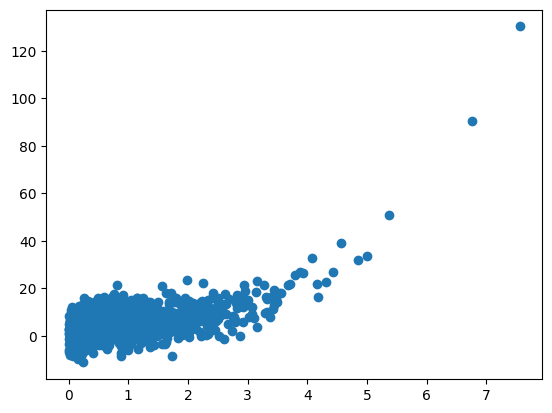

In [24]:
plt.scatter(X, Y)

In [25]:
def model(x, a, b):
    return a*np.exp(b*x)

In [26]:
popt, pcov = curve_fit(model, X, Y)
a, b = popt
print(f'Y = {a:.3f} * exp({b:.3f} * X)')

Y = 2.990 * exp(0.500 * X)


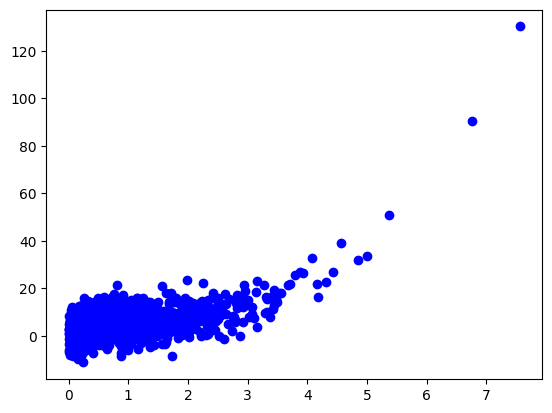

In [27]:
# Rysowanie wykresu rozproszenia
plt.scatter(X, Y, label='Dane', color='blue')

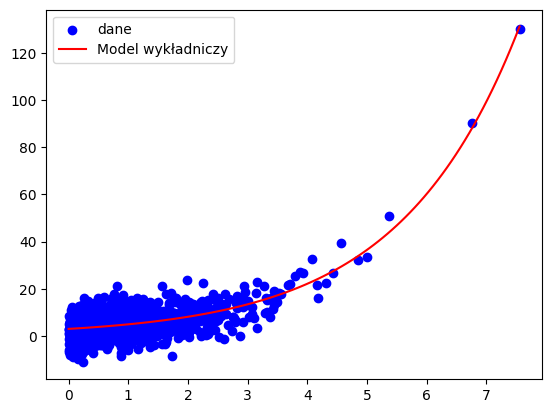

In [28]:
# Rysowanie dopasowanej funkcji wykładniczej
X_fit = np.linspace(min(X), max(X), 100)
Y_fit = model(X_fit, *popt)
plt.scatter(X, Y, label = 'dane', color='blue')
plt.plot(X_fit, Y_fit, label='Model wykładniczy', color='red')
plt.legend()

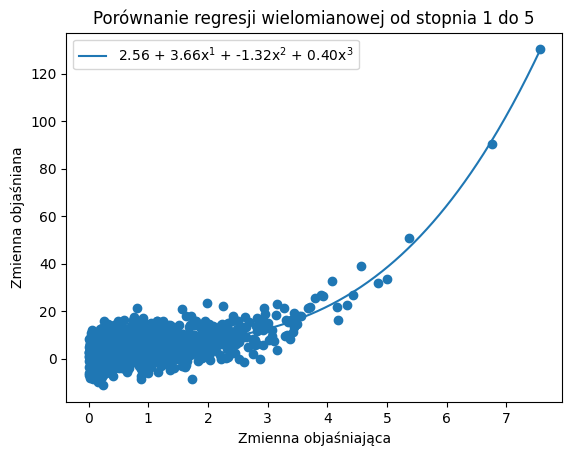

In [29]:
x_linspace = np.linspace(min(X), max(X), 500)
degree = 3
# Dopasowanie wielomianu o zadanym stopniu
wspolczynniki = np.polyfit(X, Y, degree)

# Utworzenie funkcji wielomianowej
poly_func = np.poly1d(wspolczynniki)

# Wygenerowanie wartości Y na podstawie modelu (dla ciągłej linii)
Y_fit = poly_func(x_linspace)

# Obliczenie przewidywanych wartości Y dla danych X
Y_pred = poly_func(X)

# Generowanie wzoru wielomianu w formacie LaTeX
wzor_wielomianu = " + ".join([f"{coef:.2f}x$^{i}$" if i > 0 else f"{coef:.2f}" 
                              for i, coef in enumerate(reversed(poly_func.coefficients))])
# Rysowanie dopasowania
plt.plot(x_linspace, Y_fit, label=f'{wzor_wielomianu}', color = 'red')
plt.scatter(X, Y)

# Dodatkowe elementy wykresu
plt.xlabel('Zmienna objaśniająca')
plt.ylabel('Zmienna objaśniana')
plt.title('Regresja wielomianowa stopnia {degree}')
plt.legend()
plt.show()


## zadanie 2

In [32]:
# df2 = np.loadtxt(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\metody_num\zad2_lista1.txt")
df2 = pd.read_csv(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\metody_num\zad2_lista1.txt", delim_whitespace=True, header=None, names=['values'])

# Kolumna z danymi
values = df2['values']
print(df2['values'])

0       1.838676
1       1.855805
2       0.697521
3       1.296238
4       0.755621
          ...   
9995   -0.264952
9996    1.841796
9997   -0.019291
9998    0.016198
9999    2.329453
Name: values, Length: 10000, dtype: float64


In [21]:
def simple_moving_average(data, window_size):
    return data.rolling(window=window_size, center=True).mean()

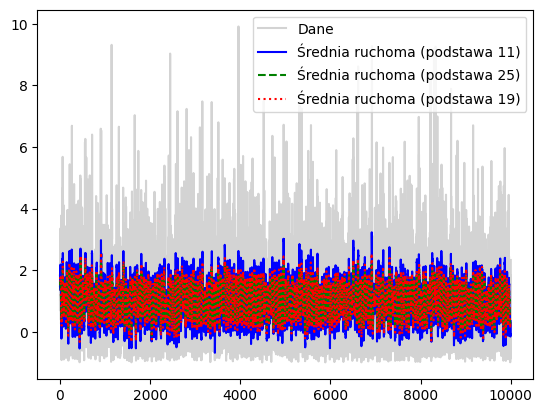

In [33]:
# Średnie ruchome o podstawie 11, 25 oraz 2p+1
window_11 = simple_moving_average(df2, 11)
window_25 = simple_moving_average(df2, 25)
p = 9
window_2p1 = simple_moving_average(df2, 2 * p + 1)
# Wykresy średnich ruchomych
plt.plot(values, label = 'Dane', color = 'lightgrey')
plt.plot(window_11, label='Średnia ruchoma (podstawa 11)', color='blue')
plt.plot(window_25, label='Średnia ruchoma (podstawa 25)', color='green', linestyle = '--')
plt.plot(window_2p1, label=f'Średnia ruchoma (podstawa {2*p+1})', color='red', linestyle = ':')
plt.legend()

In [23]:
def custom_moving_average(data, p):
    ma_values = []
    n = len(data)
    window_size = 2 * p + 1

    # Iterujemy przez dane, ale tylko od p do n - p
    for t in range(p, n - p):
        window_sum = 0

        # Sumujemy wartości od -p do p dla bieżącego punktu t
        for j in range(-p, p + 1):
            window_sum += data[t + j]

        # Obliczamy średnią dla tego punktu
        ma_value = window_sum / window_size
        ma_values.append(ma_value)

    # Uzupełniamy początkowe i końcowe wartości NaN
    ma_values = [None] * p + ma_values + [None] * p
    return pd.Series(ma_values)

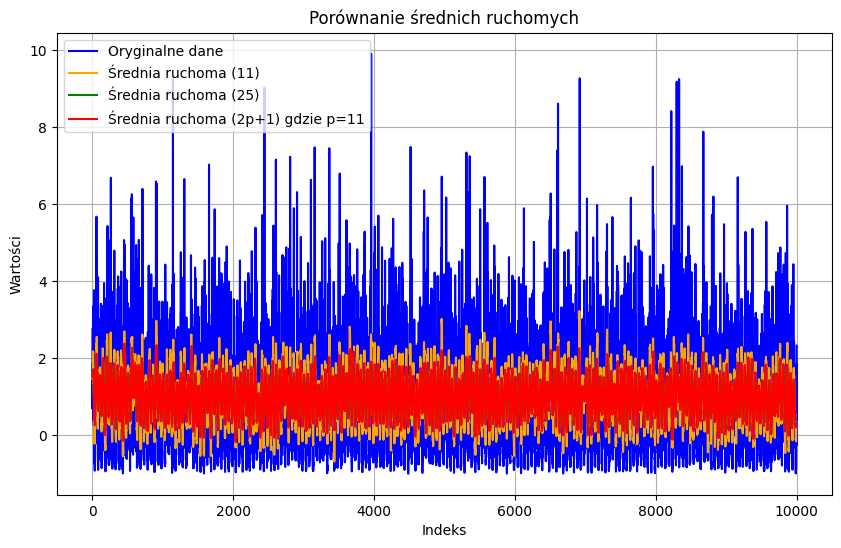

In [34]:
# Obliczanie średnich ruchomych dla różnych okien
p_11 = 5  # Średnia ruchoma 11 to p=5
ma_11 = custom_moving_average(values, p_11)

p_25 = 12  # Średnia ruchoma 25 to p=12
ma_25 = custom_moving_average(values, p_25)

# Podstawa 2p + 1, gdzie p jest dowolną liczbą wybraną przez użytkownika
p = 11
ma_2p1 = custom_moving_average(values, p)

# Wykres danych
plt.figure(figsize=(10, 6))
plt.plot(values, label='Oryginalne dane', color='blue')
plt.plot(ma_11, label='Średnia ruchoma (11)', color='orange')
plt.plot(ma_25, label='Średnia ruchoma (25)', color='green')
plt.plot(ma_2p1, label=f'Średnia ruchoma (2p+1) gdzie p={p}', color='red')
plt.legend()
plt.title('Porównanie średnich ruchomych')
plt.xlabel('Indeks')
plt.ylabel('Wartości')
plt.grid(True)
plt.show()

## zadanie 3

In [ ]:
X = np.loadtxt(r'C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad2_lista1.txt')
Y = np.loadtxt(r'C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad3_lista1.txt')

In [5]:
# from scipy.stats import linregress
# Funkcja do obliczenia współczynnika nachylenia (b1) i wyrazu wolnego (b0)
def oblicz_regresje(x, y):
    # Obliczenie współczynnika b1
    b1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)

    # Obliczenie współczynnika b0
    b0 = np.mean(y) - b1 * np.mean(x)

    return b0, b1


Współczynnik b0: 5.226906171237193
Współczynnik b1: 19.966464658199964


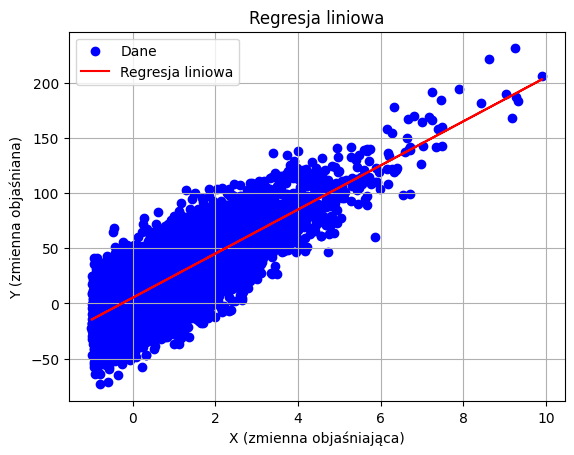

In [35]:
b0, b1 = oblicz_regresje(X, Y)

# Wyświetlenie wyników
print(f"Współczynnik b0: {b0}")
print(f"Współczynnik b1: {b1}")

# Rysowanie wykresu
plt.scatter(X, Y, label='Dane', color='blue')
plt.plot(X, b0 + b1 * X, label='Regresja liniowa', color='red')
plt.legend()
plt.title(f'Regresja liniowa')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.grid(True)
plt.show()

5.364406126766681 19.82621096175383


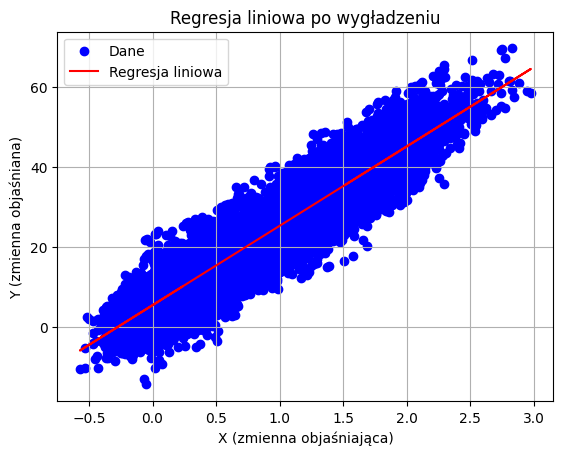

In [36]:
x_smooth = custom_moving_average(X, 6)
y_smooth = custom_moving_average(Y, 6)
b00, b11 = oblicz_regresje(x_smooth, y_smooth)
print(b00, b11)
# Rysowanie wykresu
plt.scatter(x_smooth, y_smooth, label='Dane', color='blue')
plt.plot(x_smooth, b00 + b11 * x_smooth, label='Regresja liniowa', color='red')
plt.legend()
plt.title(f'Regresja liniowa po wygładzeniu')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.grid(True)
#plt.show()

## zadanie 4

In [5]:
from scipy import stats

In [6]:
x4 = np.loadtxt(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad4_lista1.txt")

In [7]:
X = x4[:, 0]
Y = x4[:, 1]

In [63]:
b0, b1 = oblicz_regresje(X, Y)
b0, b1

(5.2851738537543556, 20.578831014287932)

In [38]:
# Konwersja do tablic numpy
X = np.array(x)
Y = np.array(y)
X, Y

(array([  1.9432217, -10.540233 ]), array([  4.8030465, 105.54756  ]))

In [70]:
Y_pred = b0 + b1 * X
residuals = Y - Y_pred

In [71]:
std_residuals = np.std(residuals)
outliers = np.abs(residuals) > 2 * std_residuals  # Obserwacje odstające
np.sum(outliers)

42

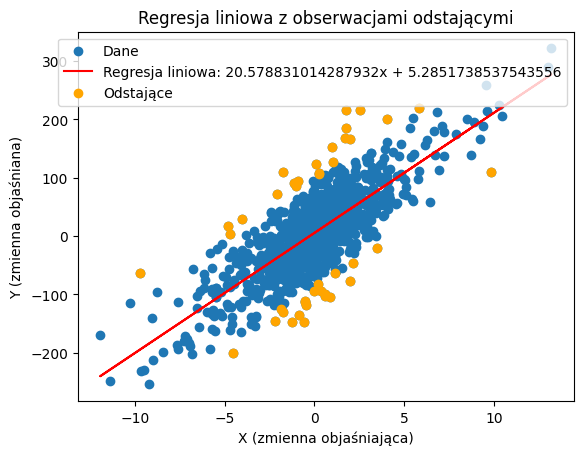

In [72]:
plt.scatter(X, Y, label='Dane')
plt.plot(X, Y_pred, color='red', label=f'Regresja liniowa: {b1}x + {b0}')
plt.scatter(X[outliers], Y[outliers], color='orange', label='Odstające', zorder=5)
plt.legend()
plt.title('Regresja liniowa z obserwacjami odstającymi')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.show()

In [73]:
X_clean = X[~outliers]
Y_clean = Y[~outliers]
b0_new, b1_new = oblicz_regresje(X_clean, Y_clean)

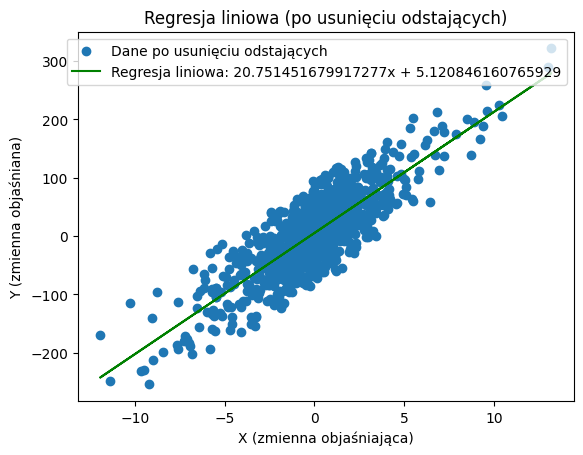

In [74]:
Y_pred_clean = intercept_clean + slope_clean * X_clean
plt.scatter(X_clean, Y_clean, label='Dane po usunięciu odstających')
plt.plot(X_clean, Y_pred_clean, color='green', label=f'Regresja liniowa: {b1_new}x + {b0_new}')
plt.legend()
plt.title(f'Regresja liniowa (po usunięciu odstających)')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.show()

## zadanie 5

In [4]:
from scipy.optimize import curve_fit

In [11]:
b00, b11 = oblicz_regresje(X[0:990], Y[0:990])
b00, b11

(5.228135761231345, 20.570106217187895)

In [12]:
Y_pred = b00 + b11 * X[991:]
errors = np.abs(Y[991:] - Y_pred)

(991.0, 1000.0)

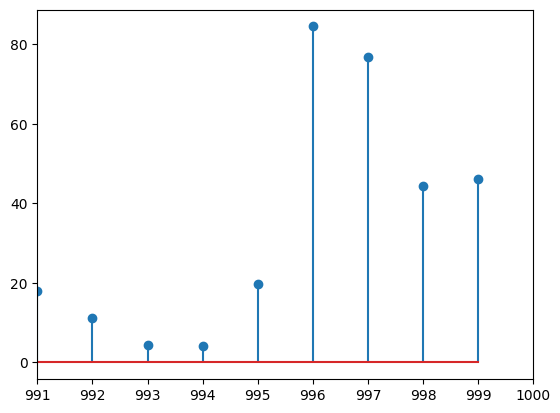

In [15]:
plt.stem(range(991, 991 + len(errors)), errors, label = 'błędy predykcji')
plt.xlim(991, 1000)

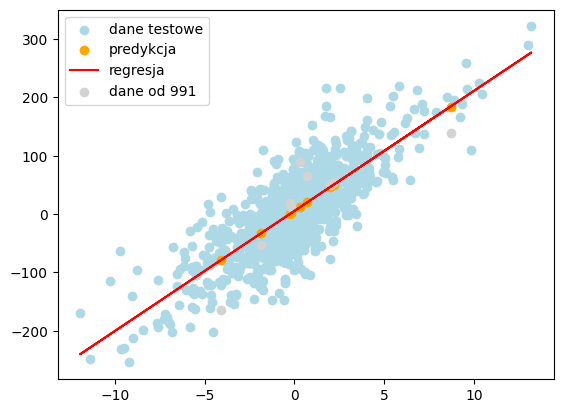

In [99]:
plt.scatter(X[0:990], Y[0:990], color = 'lightblue', label = "dane testowe")
plt.scatter(X[991:], Y_pred, color = 'orange', label = "predykcja")
plt.plot(X, b11*X + b0, color ='red', label = "regresja")
plt.scatter(X[991:], Y[991:], label = "dane od 991", color = 'lightgrey')
plt.legend()

## zadanie 6

In [8]:
x6 = np.loadtxt(r"C:\Users\Maria Nowacka\Desktop\maria\5 semestr\kaszcz\zad6_lista1.txt")
X = x6[:, 0]
Y = x6[:, 1]

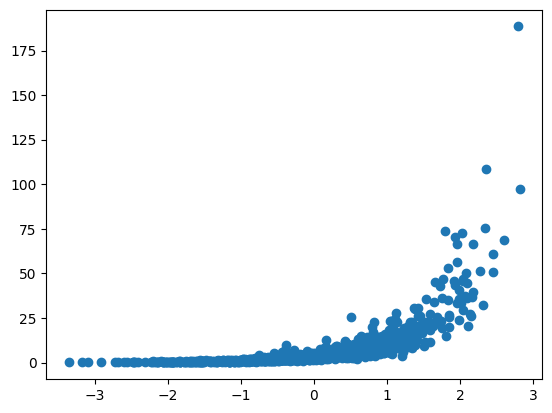

In [9]:
plt.scatter(X, Y)

In [10]:
def model(x, a, b):
    return a * np.exp(b * x)

In [ ]:
    popt, pcov = curve_fit(model, X, Y)
a, b = popt
print(f'Y = {a:.3f} * exp({b:.3f} * X)')
# Rysowanie dopasowanej funkcji wykładniczej
X_fit = np.linspace(min(X), max(X), 100)
Y_fit = model(X_fit, *popt)
plt.plot(X_fit, Y_fit, label=f'$Y = {a:.3f} * e^{{b:.3f}} * X)$', color='red')
plt.legend()

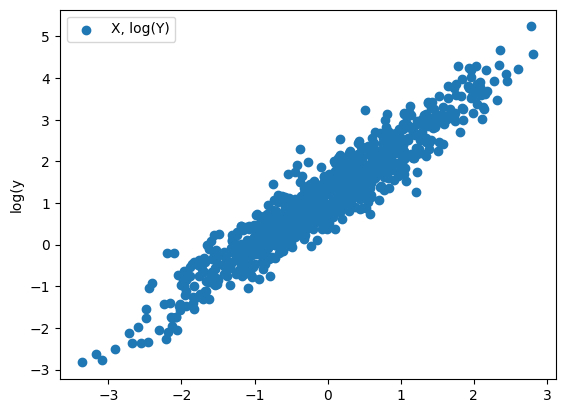

In [17]:
log_y = np.log(Y)
plt.scatter(X, np.log(Y), label = 'X, log(Y)')
plt.ylabel('log(y')
plt.legend()

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X, log_y)

# Get the slope and intercept of the fitted line
slope = model.coef_[0]
intercept = model.intercept_

# Step 5: Plot the regression line with the transformed data
plt.scatter(X, log_y, color='green', label='Transformed Data (log(y))')
plt.plot(X, model.predict(X), color='red', label=f'Linear Fit: log(y) = {slope:.2f}x + {intercept:.2f}')
plt.title('Linear Regression on Transformed Data')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-7.4173130e-01 -8.5192714e-01  8.6191029e-01  4.4143549e-01
  1.6494020e+00 -4.4618220e-01 -1.1093364e-01  2.0372948e+00
 -5.7860238e-01 -1.5078034e-01 -2.0268474e-01  2.0329058e+00
  7.2354500e-01  9.1590446e-01  1.5322104e-01  8.0914886e-01
 -9.9590932e-01  1.0696544e+00 -1.5352113e+00  2.3527244e+00
  5.2896474e-01 -3.3050172e-01  1.1175257e+00 -2.1818997e+00
 -1.8307664e+00 -8.0811458e-01 -1.6861091e-01 -6.7229106e-01
  2.3167647e+00  1.9176222e-01 -9.3613169e-01  7.0077801e-01
 -8.9963416e-01 -3.8871222e-01 -1.8739501e-02 -4.5699859e-01
 -3.3337633e-01  3.5334509e-01 -7.2019473e-01  6.1530274e-01
 -4.2348744e-01  1.1980169e+00  4.7838111e-01 -1.6629644e+00
 -2.5511235e-01 -6.1054018e-01 -3.5657543e-01 -8.1043119e-01
 -5.5204531e-01 -1.5230598e+00  2.0906483e+00  8.1054372e-01
  4.6577369e-01  9.9682634e-02  5.8093255e-01  5.0981289e-02
 -1.1814553e+00 -1.7855956e-02 -4.8790833e-01 -1.5390104e+00
  1.9412618e-01 -1.6494983e+00  4.1125033e-01  4.0036266e-01
  3.6132932e-01 -4.7822920e-01 -1.3702540e+00  3.2859472e-02
 -4.2906589e-02  3.9271521e-01  1.0515219e+00  8.6011229e-01
  1.0402680e+00  1.1752331e-01  9.6307074e-01  1.3852884e+00
 -1.0883183e+00  1.3396102e+00  1.6744104e-01  5.2843672e-01
  1.7972570e-01  5.8976547e-01 -1.1480543e+00  2.2171406e-01
 -1.3221656e+00 -1.0811832e+00  1.0372332e+00 -1.3929409e+00
 -8.0786858e-01 -3.1680420e+00  5.6648451e-01  2.3878393e-02
  8.7145568e-02  2.3555029e-01  3.1995579e-01 -2.2095898e-01
  1.4172757e+00 -2.0164124e+00  8.6130012e-01  3.1608763e-01
  1.0463076e+00 -8.9904194e-01  2.8077762e-01 -1.7530035e+00
 -9.9018740e-01 -1.1628504e+00 -7.9859244e-01  7.9920305e-01
  7.6727692e-01  9.0008017e-03 -2.1272447e+00  8.5852549e-01
 -5.4417946e-01 -1.0777158e+00 -2.7001502e-01 -1.1885803e+00
 -7.6095856e-01  3.1701318e-02  1.3752285e+00 -7.8581947e-01
 -1.5960087e+00 -2.1491815e+00 -2.4782878e+00  1.8543150e-01
 -1.6706501e+00  9.2449598e-01 -8.7600474e-01  2.8867741e-01
 -2.9086768e+00  4.5185905e-01  9.9744233e-01 -8.1701153e-01
 -1.7155251e+00  7.2068530e-01 -6.2851388e-01 -8.7771337e-01
 -3.5854558e-01 -9.4086979e-01  7.7827621e-01 -1.0058237e+00
  3.9445376e-03 -8.0953948e-01 -1.4350212e-01  7.5678049e-01
  4.4253111e-01 -1.1222941e+00  1.8418334e-01  1.4525779e+00
 -7.5116322e-01  6.0197633e-01 -1.8820188e+00  1.9798189e+00
  6.8494254e-01  1.1552318e+00  1.7563489e+00 -3.2850276e-01
 -7.1643049e-01  4.7000139e-01 -2.4340540e-02  7.6588130e-01
 -1.0107153e+00 -1.5398086e+00 -2.4020657e+00  5.3165371e-01
  5.4222097e-01  2.1294274e+00  1.2923581e+00 -7.2385741e-01
 -8.8746608e-02 -5.7492308e-01 -8.9722240e-01 -7.1698709e-01
 -9.3442135e-01  1.0412872e-01 -3.0864328e+00  1.6472267e-01
 -1.9685426e+00  1.6509351e-01  7.7094373e-01  1.8725930e-01
  9.0694767e-01 -4.4496125e-01 -1.6568290e-01  1.3714325e+00
 -3.2406831e-01 -2.9192167e-01 -9.9879182e-01 -6.4155669e-02
 -7.4925698e-01  1.4757726e+00  2.3459875e-01 -7.3408153e-02
 -1.5268000e+00  6.3566478e-01  1.0273545e+00  6.8444382e-02
  4.3009721e-01 -1.3045470e+00  7.5757950e-01 -9.3611572e-01
  1.5930927e+00  1.6804066e+00  2.7224914e-02 -8.0949881e-01
 -6.1938036e-02  9.5958228e-01 -7.3375361e-01 -7.8820870e-01
  3.0510370e-01  5.9159715e-01  1.0150455e-01 -1.9855552e+00
 -2.0617919e+00 -4.6108346e-01 -4.8955728e-01 -5.8440648e-01
 -8.4780947e-01 -1.2047667e+00 -1.8899170e-01  1.1037616e+00
  1.6224175e-01 -5.3654989e-02 -1.0504234e+00 -9.1572758e-01
 -2.4609549e+00  5.8377195e-01 -6.4594499e-01 -1.2586156e-01
  7.8557588e-01 -5.9839640e-01 -1.2776938e+00  6.6867361e-01
 -2.3197680e-01  4.4132858e-02  7.0788481e-02 -3.2023481e-01
 -1.5115334e+00  1.2783238e-01 -1.9122243e+00  1.5821913e+00
  1.1046396e+00 -1.1741750e+00 -9.1422123e-01  4.3979549e-01
  6.1850144e-01  7.9112263e-02 -1.2583266e+00  2.2123608e-01
  1.8076474e-01  2.6776133e-01  5.2128279e-01 -1.7197267e-02
 -1.8270726e+00  5.7131082e-02 -6.8478644e-01  1.4516965e+00
 -2.4471906e+00 -3.2615797e-01  2.8154232e-01 -2.5534437e+00
 -5.0598695e-01  2.5238354e-01 -7.3734402e-01  2.6347219e-01
 -5.1208393e-02  2.0845121e+00 -1.4274668e+00  5.2130188e-01
 -1.3065990e+00  1.1817698e+00 -1.1058633e+00  4.8882747e-01
 -9.9676889e-01  1.0309507e+00 -2.7041083e-01  1.2806616e+00
 -5.9291774e-01 -1.3128130e+00 -2.0214759e-01  4.2389238e-01
 -1.2081410e+00 -3.3563184e+00  1.6787172e-01  7.9098749e-01
  6.3583040e-01  4.2654132e-01 -8.3989537e-02  8.7541373e-01
 -2.3073486e+00 -1.7569014e+00 -1.3632265e+00 -1.6144614e+00
  1.0351584e-01  6.9982181e-01 -1.8372276e+00  6.9486981e-01
  2.4532525e+00  4.6671125e-01 -7.8046315e-01  7.9149206e-01
  6.8176840e-01  6.9330183e-01  2.7851093e+00  1.8442699e+00
 -1.6297258e+00  8.0836103e-01  1.7401510e+00 -9.7572443e-01
 -4.2560323e-01  9.5694046e-01  5.5989879e-01  1.4081327e+00
  1.8357132e+00 -4.3948191e-01  3.3176291e-01 -4.2550402e-01
  4.0621926e-01  1.9905569e+00  1.3771164e+00  8.1279777e-01
 -8.4641619e-01 -4.8421516e-01 -3.8618853e-01  1.2061873e+00
  2.3163697e-02  7.7401595e-01 -5.3145400e-01 -9.7471903e-01
  1.3466199e+00 -1.0395063e+00  4.7818705e-01  1.2446730e-01
  1.2038205e+00 -3.0944893e-01  1.4282329e+00 -1.9444644e+00
 -8.0976722e-01 -4.6245177e-01 -8.9146126e-01 -1.0613210e+00
  1.3408135e-01  7.8774829e-01  1.1617122e+00 -1.9432134e+00
  4.5766220e-01  1.1616296e+00  1.3806982e+00 -5.4791789e-02
  1.4050994e-02  1.0445651e+00  1.5180469e+00 -2.2125736e+00
  1.1854460e+00  9.9909941e-01  3.7788236e-01 -7.3243102e-01
  2.8129288e+00 -2.7478411e-01  1.5221342e+00  2.3390755e+00
 -2.3971810e-01  2.0111813e+00  1.9309010e+00 -1.9014500e-01
  1.2187952e+00 -1.5342356e+00  9.7675802e-01 -1.2011653e-01
 -9.0880512e-01 -4.7412116e-01  1.1711819e+00 -4.6217611e-01
 -7.9884788e-01 -4.5607785e-01  7.6696261e-01 -1.2399271e+00
  3.5125801e-01 -5.5796218e-02 -3.4979993e-01 -2.0198782e+00
 -1.1145842e-01 -6.8284251e-01 -1.6905332e+00  2.0325644e-02
 -2.5980648e+00  8.2046594e-01  4.9687801e-02 -1.1288362e+00
  8.2900999e-01 -7.4406681e-01 -5.4720421e-01  1.8711327e-01
 -1.1515128e+00 -1.1673472e+00 -1.1990618e+00  1.2167269e+00
 -7.5432513e-01  8.4056656e-01  3.7917282e-01 -1.0720288e+00
  7.2948093e-01 -4.0111895e-01  5.3642221e-01  6.4473071e-01
 -1.1488546e-02 -7.1819635e-01  1.6491185e+00 -1.1711624e-01
 -2.7587181e-01 -7.1902263e-01 -4.4450604e-01  7.2358081e-02
 -1.7567918e+00 -1.6018333e+00 -1.2282789e-01 -6.7681419e-01
  3.0196902e-01 -2.4802248e+00 -6.4394256e-02 -6.2861772e-01
 -4.9708211e-02  1.5044529e-01 -2.5458650e-01  3.8330332e-01
 -3.6037897e-01  6.5135412e-01  6.1143812e-01  8.7536527e-01
  2.0248465e+00 -2.8173925e-01  1.8066186e+00  2.1767552e-02
  8.8757134e-02  9.5639769e-01 -9.2911328e-01 -1.5506031e+00
 -1.0056854e-01 -1.0662280e+00 -3.7212321e-01 -1.7792112e+00
 -1.1180076e+00  3.3059262e-01 -1.2174057e+00  4.3226444e-01
 -9.2773547e-01  4.6784646e-01 -5.9749984e-01 -6.4488654e-01
 -7.2496535e-01  1.4034716e-01 -4.5756068e-02 -5.8813517e-01
 -9.5018350e-01 -2.9128251e-01  9.1008518e-01  7.2102969e-02
  6.5269002e-01 -1.0115101e-01  7.4182276e-01 -2.3892391e-01
  5.6565357e-01 -4.1360054e-01  1.5906605e+00 -2.4561647e-01
  6.6571989e-02 -8.6485780e-01  5.4772304e-01  6.4846110e-01
  8.8165312e-01 -6.5476147e-01  2.9892291e-01 -1.1270270e-01
 -4.8878091e-01 -8.0972611e-01  1.0445480e+00 -1.5758494e+00
 -1.0867867e+00  4.8058873e-01  4.7419130e-01  1.1692807e+00
  2.1456356e+00  3.0293436e-01  1.9161169e-01 -2.4163536e-01
 -1.2187096e-01 -7.1209842e-01  4.3978209e-01 -5.2765248e-01
 -4.9080264e-01  4.4861206e-01 -5.2226950e-01  8.9768421e-01
 -2.0681556e+00 -1.6188637e+00 -8.5535750e-01  4.4293265e-01
 -5.9343726e-01 -1.5139314e+00 -2.0073898e+00 -1.7390473e-02
 -1.4239696e+00  5.7882340e-01  1.1372679e+00 -3.8809499e-01
  1.2168279e+00  1.6302725e+00 -8.7107008e-01 -6.9522769e-02
 -1.1013060e+00 -1.7171826e-01 -5.8939825e-02 -1.6924874e+00
 -1.5456974e+00  2.2696677e+00  6.1998533e-01 -1.4217840e+00
  5.8709558e-01  3.1151414e-01 -8.5174792e-01 -7.8989348e-01
  6.4089799e-01 -1.0896076e+00  9.3570985e-01  1.7872384e+00
 -3.4549624e-01  7.5372522e-01  9.6522339e-02 -5.8824689e-01
  1.3205279e+00  4.0264838e-02  9.4788266e-01 -1.4522730e-01
 -1.1351810e-01 -4.4671936e-01 -4.8347532e-01 -1.1741685e+00
 -2.0493893e+00 -4.6714160e-01 -1.7579213e-01 -8.8397393e-01
  4.9859422e-01  7.8918580e-01 -1.5756561e+00 -5.3311402e-01
  1.8504469e+00 -7.6792073e-01 -4.3699507e-01  7.6073922e-02
 -1.3316050e+00 -9.3366804e-01 -1.1569524e-02 -5.0386365e-01
  2.6247792e-01 -4.5110732e-01 -9.1759550e-02 -1.9449551e+00
  9.2558114e-01 -1.9672901e+00  2.7751378e-01 -7.5775285e-01
 -2.1446850e-01  1.1685047e+00  3.5268267e-01 -2.3239107e-01
 -1.8382252e+00 -1.4325994e+00 -9.5200516e-01  7.5586883e-01
 -1.4194050e+00 -3.7551523e-01  1.6480562e+00  6.1234947e-01
  1.1506687e-01  2.5538589e-01 -1.1447312e+00  8.5147395e-01
 -4.2192718e-01 -5.1760013e-01 -9.7958972e-01 -8.8624257e-01
  8.1314933e-01  4.2797751e-01  7.6082825e-01 -6.6997998e-01
 -9.2730867e-03 -9.6856327e-01  1.9640866e-01 -1.2004141e+00
  1.8325894e-01 -6.1559615e-01 -1.1458780e+00 -2.1566598e+00
  2.0707762e+00 -5.3053869e-01 -4.7904645e-02  1.2038417e+00
  9.4063922e-01  1.0049762e+00  5.8177468e-02  6.1768549e-01
  4.9638506e-01  7.3255324e-02 -4.3255300e-03 -6.3737324e-01
  2.4441229e+00  6.0181678e-01 -3.9778144e-01 -7.2837528e-01
  3.0903078e-01 -1.3320559e+00  4.1595657e-01 -1.9331809e+00
 -1.2564525e+00 -4.1433421e-01  1.4784473e+00 -1.3436807e-01
  2.7423120e-01 -7.4595541e-01  5.9940230e-01  1.5277892e+00
  1.3447275e+00  3.9561733e-01  2.4342012e-01 -1.4867893e-01
  9.4465412e-01 -4.8463353e-01 -1.9289341e+00 -4.5386023e-01
  9.8497372e-01  7.8930748e-01 -6.1701251e-01  4.2838211e-01
  9.3595247e-01  2.7703902e-01 -9.5656240e-01 -8.6792364e-01
 -1.0802563e-01 -2.7657197e-01  1.4549983e+00  2.1821677e+00
 -2.5275173e-01 -6.0778008e-01 -1.0354632e+00  2.2140624e-01
 -5.9184389e-02 -9.1810860e-01 -1.4830368e+00 -4.3035804e-01
 -2.0322648e+00  5.0691627e-01  4.9501833e-01  1.8369135e-04
  3.4290181e-01  6.0587052e-01 -2.0707355e+00 -5.0532593e-01
 -1.5593552e+00  1.3487078e+00 -2.9939681e-01 -8.6547328e-01
  4.7725489e-01  4.7989342e-01  8.5086511e-01  7.0846986e-01
  6.0859863e-01 -4.5219669e-01 -3.1709185e-01 -1.4048669e+00
 -5.6979990e-02 -2.9779283e-01  1.0938250e+00 -3.9857466e-01
 -9.9205200e-01 -1.1660062e+00  8.6043352e-01  6.0543900e-02
  1.1383651e+00  1.1887140e-01  5.4980104e-01  5.8859134e-01
 -1.5327677e+00  1.7476857e-01  2.8462828e-01  2.5649792e-01
 -1.1913437e-01 -1.2696434e-01 -1.5023764e+00 -2.2747739e-01
 -2.1199372e-01  1.2290514e+00 -5.4046754e-01 -7.3498809e-01
 -7.2573457e-01  3.3140463e-01 -1.3262662e+00  1.9878107e+00
 -5.7555236e-01  5.4064001e-01  1.7589209e+00 -3.1405522e-01
  8.1239144e-01  5.9495585e-01  3.5276573e-01 -2.5948556e-01
  7.8332927e-01  5.2559553e-01 -2.2359105e+00 -5.8396447e-01
  2.1718486e+00  4.8428940e-01 -8.7386195e-01 -6.7454250e-01
  7.3732850e-01 -3.1846392e-01  4.6244553e-01  4.4325137e-01
  7.9928631e-02 -8.6292376e-01 -1.2337847e-01  1.1103440e+00
  6.2829559e-01  1.7066686e-01  1.5827869e+00  1.9143776e+00
  1.9607235e+00 -1.8298753e+00  1.2858502e+00  8.0298617e-01
 -8.2293833e-01 -1.1847841e+00 -8.1992001e-01 -8.7690127e-02
  3.7663087e-01  7.7160648e-01  1.7284591e+00 -9.7096140e-01
  7.7013245e-01  1.5068646e+00  3.0965771e-01 -6.6533259e-01
  4.3423314e-01  5.7670685e-01 -5.1948387e-01 -2.6928838e-01
  1.4406678e+00 -5.5447177e-01 -5.2526343e-01 -9.0440075e-01
 -8.8902881e-01  3.8845603e-01 -1.8551676e-01  1.6947360e-01
  1.2661491e+00  1.9286647e+00  1.0752998e+00  6.0072634e-01
  1.7258412e+00  6.6345482e-01  2.1576886e+00 -7.3581881e-02
  5.0876809e-01  7.9098428e-01 -1.9595252e-01 -6.7473001e-01
  1.0167531e+00  4.1810937e-01 -2.9724067e-01 -7.6107426e-01
  2.5101156e-01 -1.6828153e+00 -1.7278186e-02 -1.5528772e+00
 -2.0958462e+00  1.0472616e+00  3.1167682e-01 -1.2456904e+00
  5.4548506e-01 -1.5559387e-01  6.2799778e-02  7.5412225e-01
 -8.4418679e-01  1.2338158e-01  2.5831665e-01 -8.8590505e-01
 -3.5259204e-01  1.0021629e+00 -1.5579223e-01 -2.1557552e-01
  1.0513988e+00  1.4379659e-01 -8.4878622e-01  1.0102573e-01
  1.3482706e+00 -3.1190719e-01 -3.7269596e-01 -4.2876324e-01
  7.9526222e-01 -1.7831849e+00  1.2250570e+00  9.7308972e-01
  1.0428284e-01 -2.2215412e-01 -2.5015399e-03 -8.8537520e-01
  2.0972689e+00 -5.8414089e-01  1.3544164e-02 -8.5779968e-02
 -8.6900328e-01  5.6923529e-02 -8.3435035e-01  3.7798440e-01
  1.9634022e+00 -8.9067463e-01 -1.8503035e+00 -1.0430500e+00
 -1.1362985e+00 -5.0585294e-01  9.4999992e-02  7.0584972e-01
 -8.4914054e-01  8.1655428e-01 -1.3377022e+00  3.8941998e-01
 -2.1338311e+00 -4.7462988e-01  6.5317573e-03 -1.1647762e+00
 -1.0412192e+00 -1.9616262e+00 -5.4614673e-01 -1.6411761e+00
 -6.2735796e-01 -6.3094574e-01  1.0064730e+00  2.1133884e+00
 -3.4004124e-01  5.0761854e-01 -1.1909445e+00 -1.6841617e+00
  4.4555080e-01 -2.7245105e+00  4.8259910e-01  1.8542451e-01
  5.4691683e-01  1.2131931e-01 -1.5754325e+00  5.3610920e-01
 -9.5616991e-01 -1.7048247e+00  1.9989096e-01 -5.4323232e-01
 -6.8048605e-01 -1.1999123e+00 -8.7884379e-02 -1.8770095e+00
 -7.7594199e-01 -8.7722850e-01 -1.9497943e-01  3.9229400e-01
  6.6397843e-01 -5.9754260e-01 -3.7861073e-01  8.1254387e-01
  8.0280161e-01 -4.9610262e-01 -1.2251791e+00 -1.1807541e+00
  5.1519497e-01 -8.9436753e-02  7.8423933e-01  6.4245454e-01
 -2.3588582e-01  9.1736214e-01 -3.6274429e-01  9.7643923e-02
 -4.4151339e-01 -4.5333630e-01 -2.1696681e-01  7.7188410e-01
  3.4092770e-01 -5.4178411e-01  1.5292369e+00  3.3198729e-01
 -4.4288192e-01 -4.4227558e-01  2.0019444e+00  5.1162320e-01
 -7.0999148e-01  1.9563405e+00  2.2030601e-01 -1.5244555e-01
  2.4656002e-02  7.1808043e-01  1.0279103e+00  3.1122695e-01
  1.2879712e+00  2.0499981e-01 -3.9480509e-01 -1.0959254e+00
 -3.8279610e-01 -3.6611442e-01  3.6693450e-01  2.6472565e-01
  8.7155324e-01 -1.8633670e-01  3.5870151e-01  1.6242797e-01
  2.4069470e-01  7.1216381e-01  5.1160547e-01  1.7493777e+00
 -3.4938209e-01 -3.1988436e-02 -2.1996237e+00 -6.7975903e-01
  2.0409448e+00  8.2928080e-01  1.8483779e+00 -6.9572578e-01
 -7.8188576e-01 -3.6208421e-01  2.6014498e+00  1.8284412e+00
 -5.1078130e-01 -8.5879383e-01  8.4862076e-01 -3.3471616e-01
 -5.8159676e-01 -2.0179414e-01  8.5135316e-02 -1.2229131e+00
 -1.2378728e+00 -1.2625878e+00 -8.7174695e-01 -8.0854262e-01
  1.9346314e-01 -1.1024895e+00 -1.6609650e-01 -1.8604245e-02
 -5.8837581e-01 -1.4411495e-01 -8.0481605e-01 -8.6402162e-01
  6.6080128e-01  1.0707253e-01 -8.9173341e-01 -7.5367075e-02
 -7.1320960e-01 -8.5072405e-01  1.0512100e+00  1.2471552e+00
 -6.0815472e-02 -1.3071103e+00  1.0544747e+00  8.4107123e-01
 -2.6797467e+00  1.1240401e+00 -6.5661161e-01  6.4174515e-01
  1.3704352e+00 -3.4071857e-01 -8.1457500e-02 -1.0772504e+00
 -1.1337715e+00 -1.2016355e-01 -4.6452426e-01 -7.0253263e-02
 -1.0161405e+00 -1.2153463e+00 -1.1972833e+00  7.9662422e-01
  2.8092863e-01 -6.3224560e-01  1.2599209e+00  7.7171117e-01
  1.8836990e-01  3.1936861e-01  9.6951317e-01  6.1016746e-01
  2.0650469e-01 -4.1686413e-01 -4.6599784e-01 -1.9326065e+00
 -4.0717804e-01  6.3762108e-01 -3.2126213e-01 -2.4955958e-01
  1.2617032e-01 -7.8917413e-01  1.8288196e-01 -1.3239677e+00
  3.1874875e-01 -2.0751121e-01 -3.7576006e-01  1.0090827e-01
  4.6874868e-01 -6.0416355e-01 -1.2263932e-01  2.8681543e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.